In [2]:
import json

In [3]:
def aggregate_results(output_dir, tasks, PIDs):
    aggregate_results = {'auc': 0, 'auprc': 0, 'f1': 0, 'total_samples': 0}
    pid = PIDs[-1]  # Assuming the last PID file contains all the results
    result_file = f"{output_dir}/{tasks}_{pid}_results.json"
    
    with open(result_file, 'r') as f:
        data = json.load(f)
    
    # Iterate over each subset to aggregate metrics
    for i in range(len(data['PID'])):
        sample_size = data['sample_size'][i]
        test_auc = data['auc'][i]['test']
        test_auprc = data['auprc'][i]['test']
        test_f1 = data['f1'][i]['test']
        
        # Debug prints to check what exactly is being read from JSON
        print(f"Data for PID={data['PID'][i]}: AUC={test_auc}, AUPRC={test_auprc}, F1={test_f1}, Sample Size={sample_size}")
        
        # Aggregate 'test' values, weighted by sample size
        aggregate_results['total_samples'] += sample_size
        aggregate_results['auc'] += test_auc * sample_size
        aggregate_results['auprc'] += test_auprc * sample_size
        aggregate_results['f1'] += test_f1 * sample_size
    
    # Final calculation of weighted averages
    if aggregate_results['total_samples'] > 0:
        aggregate_results['auc'] /= aggregate_results['total_samples']
        aggregate_results['auprc'] /= aggregate_results['total_samples']
        aggregate_results['f1'] /= aggregate_results['total_samples']
    
    return aggregate_results

# Baseline

In [2]:
import pickle
def load_data(file_path):
    """ Load the data from a pickle file. """
    with open(file_path, 'rb') as f:
        return pickle.load(f)

In [10]:
load_data("/data/wang/junh/results/Fuse_moe/all_los/los-48-cxr-notes-ecg/TS/TS_48/Atten/layer3/batch/irregular_TS_64/irregular_Text_64/0.0004_8_8_128_1_2_[16, 5]_512/result.pkl")


{42: {'auc': {'val': 0.7849897750511248, 'test': 0.7968272945880954},
  'auprc': {'val': 0.6717876499354778, 'test': 0.7175540451355897},
  'f1': {'val': 0.7135678391959799, 'test': 0.7162790697674418}}}

In [11]:
# 4 label 4 modality
print(load_data("/data/wang/junh/results/Fuse_moe/all_los/multiclass/los-48-cxr-notes-ecg/TS_CXR_Text_ECG/TS_48/Atten/f1/result.pkl"))

{'42': {'confusion_matrix': {'test': array([[119, 100,   9,   9],
       [132, 153,  38,  25],
       [ 27,  55,  23,  27],
       [  9,  27,  13,  10]])}, 'classification_report': {'test': '                 precision    recall  f1-score   support\n\n       ≤ 3 days       0.41      0.50      0.45       237\n > 3 & ≤ 7 days       0.46      0.44      0.45       348\n> 7 & ≤ 14 days       0.28      0.17      0.21       132\n      > 14 days       0.14      0.17      0.15        59\n\n       accuracy                           0.39       776\n      macro avg       0.32      0.32      0.32       776\n   weighted avg       0.39      0.39      0.39       776\n'}, 'f1': {'test': 0.31750538539054574}}}


In [17]:
# 4 label 3 modality
print(load_data("/data/wang/junh/results/Fuse_moe/all_los/multiclass/los-48-cxr-notes-ecg/TS_CXR_Text/TS_48/Atten/f1/result.pkl"))

{'42': {'confusion_matrix': {'test': array([[131,  89,  17,   0],
       [117, 174,  57,   0],
       [ 18,  54,  60,   0],
       [  2,  28,  29,   0]])}, 'classification_report': {'test': '                 precision    recall  f1-score   support\n\n       ≤ 3 days       0.49      0.55      0.52       237\n > 3 & ≤ 7 days       0.50      0.50      0.50       348\n> 7 & ≤ 14 days       0.37      0.45      0.41       132\n      > 14 days       0.00      0.00      0.00        59\n\n       accuracy                           0.47       776\n      macro avg       0.34      0.38      0.36       776\n   weighted avg       0.44      0.47      0.45       776\n'}, 'f1': {'test': 0.35693901109239257}}}


In [10]:
# 4 label TS
print(load_data("/data/wang/junh/results/Fuse_moe/all_los/multiclass/los-48-cxr-notes-ecg/TS/TS_48/Atten/layer3/batch/irregular_TS_64/irregular_Text_64/0.0004_8_8_128_1_2_[16, 5]_512/result.pkl"))

{42: {}, '42': {'confusion_matrix': {'test': array([[120, 106,   7,   4],
       [ 98, 215,  18,  17],
       [ 17,  76,  10,  29],
       [  0,  31,   8,  20]])}, 'classification_report': {'test': '                 precision    recall  f1-score   support\n\n       ≤ 3 days       0.51      0.51      0.51       237\n > 3 & ≤ 7 days       0.50      0.62      0.55       348\n> 7 & ≤ 14 days       0.23      0.08      0.11       132\n      > 14 days       0.29      0.34      0.31        59\n\n       accuracy                           0.47       776\n      macro avg       0.38      0.38      0.37       776\n   weighted avg       0.44      0.47      0.45       776\n'}, 'f1': {'test': 0.371740380319238}}}


In [13]:
# 4 label Text
print(load_data("/data/wang/junh/results/Fuse_moe/all_los/multiclass/los-48-cxr-notes-ecg/Text/Text_48/bioLongformer/1024/layer3/batch/regular_TS/irregular_Text_64/use_pt_text_embeddings/2e-05_2_3_8_8_128_1_2_[16, 5]_512/result.pkl"))

{42: {}, '42': {'confusion_matrix': {'test': array([[ 60, 177,   0,   0],
       [ 41, 307,   0,   0],
       [ 10, 122,   0,   0],
       [  2,  57,   0,   0]])}, 'classification_report': {'test': '                 precision    recall  f1-score   support\n\n       ≤ 3 days       0.53      0.25      0.34       237\n > 3 & ≤ 7 days       0.46      0.88      0.61       348\n> 7 & ≤ 14 days       0.00      0.00      0.00       132\n      > 14 days       0.00      0.00      0.00        59\n\n       accuracy                           0.47       776\n      macro avg       0.25      0.28      0.24       776\n   weighted avg       0.37      0.47      0.38       776\n'}, 'f1': {'test': 0.23754415712872687}}}


In [14]:
# 4 label CXR
print(load_data("/data/wang/junh/results/Fuse_moe/all_los/multiclass/los-48-cxr-notes-ecg/CXR/batch/regular_TS/regular_Text/8_8_128_1_2_[16, 5]_512/result.pkl"))

{42: {}, '42': {'confusion_matrix': {'test': array([[  5, 232,   0,   0],
       [  9, 339,   0,   0],
       [  2, 127,   3,   0],
       [  1,  58,   0,   0]])}, 'classification_report': {'test': '                 precision    recall  f1-score   support\n\n       ≤ 3 days       0.29      0.02      0.04       237\n > 3 & ≤ 7 days       0.45      0.97      0.61       348\n> 7 & ≤ 14 days       1.00      0.02      0.04       132\n      > 14 days       0.00      0.00      0.00        59\n\n       accuracy                           0.45       776\n      macro avg       0.44      0.25      0.17       776\n   weighted avg       0.46      0.45      0.29       776\n'}, 'f1': {'test': 0.17448623949180264}}}


In [4]:
# 4 label ECG
print(load_data("/data/wang/junh/results/Fuse_moe/all_los/multiclass/los-48-cxr-notes-ecg/ECG/ECG_48/bioLongformer/f1/result.pkl"))

{'42': {'confusion_matrix': {'test': array([[  4, 207,  11,  15],
       [  9, 286,  23,  30],
       [  3, 105,  10,  14],
       [  1,  50,   4,   4]])}, 'classification_report': {'test': '                 precision    recall  f1-score   support\n\n       ≤ 3 days       0.24      0.02      0.03       237\n > 3 & ≤ 7 days       0.44      0.82      0.57       348\n> 7 & ≤ 14 days       0.21      0.08      0.11       132\n      > 14 days       0.06      0.07      0.07        59\n\n       accuracy                           0.39       776\n      macro avg       0.24      0.25      0.20       776\n   weighted avg       0.31      0.39      0.29       776\n'}, 'f1': {'test': 0.1956195333375151}}}


In [12]:
# 4 label TS_Text
print(load_data("/data/wang/junh/results/Fuse_moe/all_los/multiclass/los-48-cxr-notes-ecg/TS_Text/TS_48/Atten/f1/result.pkl"))

{'42': {'confusion_matrix': {'test': array([[135,  95,   3,   4],
       [122, 211,  14,   1],
       [ 18, 101,   7,   6],
       [  1,  48,   8,   2]])}, 'classification_report': {'test': '                 precision    recall  f1-score   support\n\n       ≤ 3 days       0.49      0.57      0.53       237\n > 3 & ≤ 7 days       0.46      0.61      0.53       348\n> 7 & ≤ 14 days       0.22      0.05      0.09       132\n      > 14 days       0.15      0.03      0.06        59\n\n       accuracy                           0.46       776\n      macro avg       0.33      0.32      0.30       776\n   weighted avg       0.41      0.46      0.42       776\n'}, 'f1': {'test': 0.2981916159857673}}}


In [13]:
# 4 label TS_CXR
print(load_data("/data/wang/junh/results/Fuse_moe/all_los/multiclass/los-48-cxr-notes-ecg/TS_CXR/TS_48/Atten/f1/result.pkl"))

{'42': {'confusion_matrix': {'test': array([[144,  80,   8,   5],
       [140, 166,  36,   6],
       [ 22,  64,  33,  13],
       [  1,  34,  17,   7]])}, 'classification_report': {'test': '                 precision    recall  f1-score   support\n\n       ≤ 3 days       0.47      0.61      0.53       237\n > 3 & ≤ 7 days       0.48      0.48      0.48       348\n> 7 & ≤ 14 days       0.35      0.25      0.29       132\n      > 14 days       0.23      0.12      0.16        59\n\n       accuracy                           0.45       776\n      macro avg       0.38      0.36      0.36       776\n   weighted avg       0.44      0.45      0.44       776\n'}, 'f1': {'test': 0.36419287615467355}}}


In [14]:
# 4 label TS_ECG
print(load_data("/data/wang/junh/results/Fuse_moe/all_los/multiclass/los-48-cxr-notes-ecg/TS_ECG/TS_48/Atten/f1/result.pkl"))

{'42': {'confusion_matrix': {'test': array([[ 31, 196,   9,   1],
       [ 32, 281,  33,   2],
       [  6, 101,  22,   3],
       [  0,  46,  13,   0]])}, 'classification_report': {'test': '                 precision    recall  f1-score   support\n\n       ≤ 3 days       0.45      0.13      0.20       237\n > 3 & ≤ 7 days       0.45      0.81      0.58       348\n> 7 & ≤ 14 days       0.29      0.17      0.21       132\n      > 14 days       0.00      0.00      0.00        59\n\n       accuracy                           0.43       776\n      macro avg       0.30      0.28      0.25       776\n   weighted avg       0.39      0.43      0.36       776\n'}, 'f1': {'test': 0.24783249882149092}}}


In [15]:
# 4 label TS_CXR_Text
print(load_data("/data/wang/junh/results/Fuse_moe/all_los/multiclass/los-48-cxr-notes-ecg/TS_CXR_Text/TS_48/Atten/f1/result.pkl"))

{'42': {'confusion_matrix': {'test': array([[131,  89,  17,   0],
       [117, 174,  57,   0],
       [ 18,  54,  60,   0],
       [  2,  28,  29,   0]])}, 'classification_report': {'test': '                 precision    recall  f1-score   support\n\n       ≤ 3 days       0.49      0.55      0.52       237\n > 3 & ≤ 7 days       0.50      0.50      0.50       348\n> 7 & ≤ 14 days       0.37      0.45      0.41       132\n      > 14 days       0.00      0.00      0.00        59\n\n       accuracy                           0.47       776\n      macro avg       0.34      0.38      0.36       776\n   weighted avg       0.44      0.47      0.45       776\n'}, 'f1': {'test': 0.35693901109239257}}}


In [17]:
# 4 label TS_CXR_ECG
print(load_data("/data/wang/junh/results/Fuse_moe/all_los/multiclass/los-48-cxr-notes-ecg/TS_CXR_ECG/TS_48/Atten/f1/result.pkl"))

{'42': {'confusion_matrix': {'test': array([[158,  72,   7,   0],
       [169, 166,   9,   4],
       [ 41,  78,   7,   6],
       [  7,  43,   6,   3]])}, 'classification_report': {'test': '                 precision    recall  f1-score   support\n\n       ≤ 3 days       0.42      0.67      0.52       237\n > 3 & ≤ 7 days       0.46      0.48      0.47       348\n> 7 & ≤ 14 days       0.24      0.05      0.09       132\n      > 14 days       0.23      0.05      0.08        59\n\n       accuracy                           0.43       776\n      macro avg       0.34      0.31      0.29       776\n   weighted avg       0.39      0.43      0.39       776\n'}, 'f1': {'test': 0.28905488511949473}}}


In [18]:
# 4 label TS_ECG_Text
print(load_data("/data/wang/junh/results/Fuse_moe/all_los/multiclass/los-48-cxr-notes-ecg/TS_ECG_Text/TS_48/Atten/f1/result.pkl"))

{'42': {'confusion_matrix': {'test': array([[ 61, 149,   6,  21],
       [ 61, 201,  32,  54],
       [ 10,  51,  15,  56],
       [  1,  16,  14,  28]])}, 'classification_report': {'test': '                 precision    recall  f1-score   support\n\n       ≤ 3 days       0.46      0.26      0.33       237\n > 3 & ≤ 7 days       0.48      0.58      0.53       348\n> 7 & ≤ 14 days       0.22      0.11      0.15       132\n      > 14 days       0.18      0.47      0.26        59\n\n       accuracy                           0.39       776\n      macro avg       0.34      0.36      0.32       776\n   weighted avg       0.41      0.39      0.38       776\n'}, 'f1': {'test': 0.3157136071493341}}}


In [8]:
# 3 label 3 modality
print(load_data("/data/wang/junh/results/Fuse_moe/all_los/multiclass/3labels/los-48-cxr-notes-ecg/TS_CXR_Text/TS_48/Atten/f1/result.pkl"))

{'42': {'confusion_matrix': {'test': array([[127,  87,  23],
       [110, 148,  90],
       [ 19,  53, 119]])}, 'classification_report': {'test': '                 precision    recall  f1-score   support\n\n       ≤ 3 days       0.50      0.54      0.52       237\n > 3 & ≤ 7 days       0.51      0.43      0.47       348\n> 7 & ≤ 14 days       0.51      0.62      0.56       191\n\n       accuracy                           0.51       776\n      macro avg       0.51      0.53      0.51       776\n   weighted avg       0.51      0.51      0.50       776\n'}, 'f1': {'test': 0.5144231803043281}}}


In [12]:
# 3 label 4 modality
print(load_data("/data/wang/junh/results/Fuse_moe/all_los/multiclass/3labels/los-48-cxr-notes-ecg/TS_CXR_Text_ECG/TS_48/Atten/f1/result.pkl"))

{'42': {'confusion_matrix': {'test': array([[122,  96,  19],
       [115, 171,  62],
       [ 19,  94,  78]])}, 'classification_report': {'test': '                 precision    recall  f1-score   support\n\n       ≤ 3 days       0.48      0.51      0.49       237\n > 3 & ≤ 7 days       0.47      0.49      0.48       348\n> 7 & ≤ 14 days       0.49      0.41      0.45       191\n\n       accuracy                           0.48       776\n      macro avg       0.48      0.47      0.47       776\n   weighted avg       0.48      0.48      0.48       776\n'}, 'f1': {'test': 0.47433760878506354}}}


- missingInd included

In [5]:
# 4 label 4 modality
print(load_data("/data/wang/junh/results/Fuse_moe/all_los/multiclass/missingInd/los-48-cxr-notes-ecg-missingInd/TS_CXR_Text_ECG/TS_48/Atten/f1/result.pkl"))

{'42': {'confusion_matrix': {'test': array([[ 597, 1088,   36,    8],
       [ 400, 1585,  239,   77],
       [  52,  463,  252,   78],
       [  21,  172,  150,   46]])}, 'classification_report': {'test': '                 precision    recall  f1-score   support\n\n       ≤ 3 days       0.56      0.35      0.43      1729\n > 3 & ≤ 7 days       0.48      0.69      0.57      2301\n> 7 & ≤ 14 days       0.37      0.30      0.33       845\n      > 14 days       0.22      0.12      0.15       389\n\n       accuracy                           0.47      5264\n      macro avg       0.41      0.36      0.37      5264\n   weighted avg       0.47      0.47      0.45      5264\n'}, 'f1': {'test': 0.36918335971886374}}}


In [6]:
# 4 label TS
print(load_data("/data/wang/junh/results/Fuse_moe/all_los/multiclass/missingInd/los-48-cxr-notes-ecg-missingInd/TS/TS_48/Atten/f1/result.pkl"))

{'42': {'confusion_matrix': {'test': array([[ 716,  994,   17,    2],
       [ 483, 1655,  138,   25],
       [  50,  615,  148,   32],
       [  13,  246,  100,   30]])}, 'classification_report': {'test': '                 precision    recall  f1-score   support\n\n       ≤ 3 days       0.57      0.41      0.48      1729\n > 3 & ≤ 7 days       0.47      0.72      0.57      2301\n> 7 & ≤ 14 days       0.37      0.18      0.24       845\n      > 14 days       0.34      0.08      0.13       389\n\n       accuracy                           0.48      5264\n      macro avg       0.44      0.35      0.35      5264\n   weighted avg       0.48      0.48      0.45      5264\n'}, 'f1': {'test': 0.3527703758868931}}}


In [8]:
# 4 label Text
print(load_data("/data/wang/junh/results/Fuse_moe/all_los/multiclass/missingInd/los-48-cxr-notes-ecg-missingInd/Text/Text_48/bioLongformer/1024/f1/result.pkl"))

{'42': {'confusion_matrix': {'test': array([[ 252, 1477,    0,    0],
       [ 202, 2099,    0,    0],
       [  32,  813,    0,    0],
       [   9,  380,    0,    0]])}, 'classification_report': {'test': '                 precision    recall  f1-score   support\n\n       ≤ 3 days       0.51      0.15      0.23      1729\n > 3 & ≤ 7 days       0.44      0.91      0.59      2301\n> 7 & ≤ 14 days       0.00      0.00      0.00       845\n      > 14 days       0.00      0.00      0.00       389\n\n       accuracy                           0.45      5264\n      macro avg       0.24      0.26      0.21      5264\n   weighted avg       0.36      0.45      0.33      5264\n'}, 'f1': {'test': 0.20509880638629124}}}


In [7]:
# 4 label CXR
print(load_data("/data/wang/junh/results/Fuse_moe/all_los/multiclass/missingInd/los-48-cxr-notes-ecg-missingInd/CXR/CXR_48/bioLongformer/f1/result.pkl"))

{'42': {'confusion_matrix': {'test': array([[  33, 1684,   12,    0],
       [  35, 2231,   35,    0],
       [  11,  819,   15,    0],
       [   7,  373,    9,    0]])}, 'classification_report': {'test': '                 precision    recall  f1-score   support\n\n       ≤ 3 days       0.38      0.02      0.04      1729\n > 3 & ≤ 7 days       0.44      0.97      0.60      2301\n> 7 & ≤ 14 days       0.21      0.02      0.03       845\n      > 14 days       0.00      0.00      0.00       389\n\n       accuracy                           0.43      5264\n      macro avg       0.26      0.25      0.17      5264\n   weighted avg       0.35      0.43      0.28      5264\n'}, 'f1': {'test': 0.1678591355803882}}}


In [9]:
# 4 label CXR
print(load_data("/data/wang/junh/results/Fuse_moe/all_los/multiclass/missingInd/los-48-cxr-notes-ecg-missingInd/ECG/ECG_48/bioLongformer/f1/result.pkl"))

{'42': {'confusion_matrix': {'test': array([[ 319, 1410,    0,    0],
       [ 425, 1876,    0,    0],
       [ 131,  713,    0,    1],
       [  60,  329,    0,    0]])}, 'classification_report': {'test': '                 precision    recall  f1-score   support\n\n       ≤ 3 days       0.34      0.18      0.24      1729\n > 3 & ≤ 7 days       0.43      0.82      0.57      2301\n> 7 & ≤ 14 days       0.00      0.00      0.00       845\n      > 14 days       0.00      0.00      0.00       389\n\n       accuracy                           0.42      5264\n      macro avg       0.19      0.25      0.20      5264\n   weighted avg       0.30      0.42      0.33      5264\n'}, 'f1': {'test': 0.20137184438926786}}}


In [3]:
# 4 label TS_ECG_Text
print(load_data("/data/wang/junh/results/Fuse_moe/all_los/multiclass/missingInd/los-48-cxr-notes-ecg-missingInd/TS_ECG_Text/TS_48/Atten/f1/result.pkl"))

{'42': {'confusion_matrix': {'test': array([[ 874,  800,   46,    9],
       [ 723, 1240,  303,   35],
       [  90,  414,  300,   41],
       [  26,  155,  170,   38]])}, 'classification_report': {'test': '                 precision    recall  f1-score   support\n\n       ≤ 3 days       0.51      0.51      0.51      1729\n > 3 & ≤ 7 days       0.48      0.54      0.51      2301\n> 7 & ≤ 14 days       0.37      0.36      0.36       845\n      > 14 days       0.31      0.10      0.15       389\n\n       accuracy                           0.47      5264\n      macro avg       0.42      0.37      0.38      5264\n   weighted avg       0.46      0.47      0.46      5264\n'}, 'f1': {'test': 0.3804875873387015}}}


In [4]:
# 4 label TS_CXR_ECG
print(load_data("/data/wang/junh/results/Fuse_moe/all_los/multiclass/missingInd/los-48-cxr-notes-ecg-missingInd/TS_CXR_ECG/TS_48/Atten/f1/result.pkl"))

{'42': {'confusion_matrix': {'test': array([[1373,  271,   28,   57],
       [1310,  619,  132,  240],
       [ 240,  263,  128,  214],
       [  64,  106,   83,  136]])}, 'classification_report': {'test': '                 precision    recall  f1-score   support\n\n       ≤ 3 days       0.46      0.79      0.58      1729\n > 3 & ≤ 7 days       0.49      0.27      0.35      2301\n> 7 & ≤ 14 days       0.35      0.15      0.21       845\n      > 14 days       0.21      0.35      0.26       389\n\n       accuracy                           0.43      5264\n      macro avg       0.38      0.39      0.35      5264\n   weighted avg       0.44      0.43      0.40      5264\n'}, 'f1': {'test': 0.35077512503349106}}}


# Continuous Weights

In [4]:
# 4 label 4 mods
print(load_data("/data/wang/junh/results/Fuse_moe/all_los/multiclass/weighted/los-48-cxr-notes-ecg/TS_CXR_Text_ECG/TS_48/Atten/f1/result.pkl"))

{'42': {'confusion_matrix': {'test': array([[109, 104,  15,   9],
       [109, 166,  49,  24],
       [ 23,  51,  31,  27],
       [  7,  21,  16,  15]])}, 'classification_report': {'test': '                 precision    recall  f1-score   support\n\n       ≤ 3 days       0.44      0.46      0.45       237\n > 3 & ≤ 7 days       0.49      0.48      0.48       348\n> 7 & ≤ 14 days       0.28      0.23      0.26       132\n      > 14 days       0.20      0.25      0.22        59\n\n       accuracy                           0.41       776\n      macro avg       0.35      0.36      0.35       776\n   weighted avg       0.41      0.41      0.41       776\n'}, 'f1': {'test': 0.3524171465772663}}}


In [6]:
# 4 label TS_CXR_Text
print(load_data("/data/wang/junh/results/Fuse_moe/all_los/multiclass/los/TS_CXR_Text/TS_48/Atten/f1/result.pkl"))

{'42': {'confusion_matrix': array([[62, 18,  3, 11],
       [60, 62, 11, 21],
       [11, 44, 11, 24],
       [ 2, 26,  4, 14]]), 'classification_report': '                 precision    recall  f1-score   support\n\n       ≤ 3 days       0.46      0.66      0.54        94\n > 3 & ≤ 7 days       0.41      0.40      0.41       154\n> 7 & ≤ 14 days       0.38      0.12      0.18        90\n      > 14 days       0.20      0.30      0.24        46\n\n       accuracy                           0.39       384\n      macro avg       0.36      0.37      0.34       384\n   weighted avg       0.39      0.39      0.37       384\n', 'f1': 0.3439081782309925}}


In [7]:
# 4 label TS_CXR_ECG
print(load_data("/data/wang/junh/results/Fuse_moe/all_los/multiclass/weighted/los-48-cxr-notes-ecg/TS_CXR_ECG/TS_48/Atten/f1/result.pkl"))

{'42': {'confusion_matrix': {'test': array([[134, 100,   3,   0],
       [141, 201,   5,   1],
       [ 31,  97,   2,   2],
       [  6,  48,   4,   1]])}, 'classification_report': {'test': '                 precision    recall  f1-score   support\n\n       ≤ 3 days       0.43      0.57      0.49       237\n > 3 & ≤ 7 days       0.45      0.58      0.51       348\n> 7 & ≤ 14 days       0.14      0.02      0.03       132\n      > 14 days       0.25      0.02      0.03        59\n\n       accuracy                           0.44       776\n      macro avg       0.32      0.29      0.26       776\n   weighted avg       0.38      0.44      0.38       776\n'}, 'f1': {'test': 0.26340020316953194}}}


In [8]:
# 4 label TS_ECG_Text
print(load_data("/data/wang/junh/results/Fuse_moe/all_los/multiclass/weighted/los-48-cxr-notes-ecg/TS_ECG_Text/TS_48/Atten/f1/result.pkl"))

{'42': {'confusion_matrix': {'test': array([[ 56, 154,   2,  25],
       [ 58, 201,  17,  72],
       [  6,  46,  10,  70],
       [  0,  17,  10,  32]])}, 'classification_report': {'test': '                 precision    recall  f1-score   support\n\n       ≤ 3 days       0.47      0.24      0.31       237\n > 3 & ≤ 7 days       0.48      0.58      0.52       348\n> 7 & ≤ 14 days       0.26      0.08      0.12       132\n      > 14 days       0.16      0.54      0.25        59\n\n       accuracy                           0.39       776\n      macro avg       0.34      0.36      0.30       776\n   weighted avg       0.41      0.39      0.37       776\n'}, 'f1': {'test': 0.30088768689328294}}}


- missingInd

In [11]:
# 4 label 4 mods
print(load_data("/data/wang/junh/results/Fuse_moe/all_los/multiclass/missingInd/weighted/los-48-cxr-notes-ecg-missingInd/TS_CXR_Text_ECG/TS_48/Atten/f1/result.pkl"))

{'42': {'confusion_matrix': {'test': array([[ 920,  742,   45,   22],
       [ 691, 1218,  258,  134],
       [  89,  375,  251,  130],
       [  25,  142,  131,   91]])}, 'classification_report': {'test': '                 precision    recall  f1-score   support\n\n       ≤ 3 days       0.53      0.53      0.53      1729\n > 3 & ≤ 7 days       0.49      0.53      0.51      2301\n> 7 & ≤ 14 days       0.37      0.30      0.33       845\n      > 14 days       0.24      0.23      0.24       389\n\n       accuracy                           0.47      5264\n      macro avg       0.41      0.40      0.40      5264\n   weighted avg       0.47      0.47      0.47      5264\n'}, 'f1': {'test': 0.4020637325302251}}}


In [5]:
# 4 label TS_CXR_Text
print(load_data("/data/wang/junh/results/Fuse_moe/all_los/multiclass/missingInd/weighted/los-48-cxr-notes-ecg-missingInd/TS_CXR_Text/TS_48/Atten/f1/result.pkl"))

{'42': {'confusion_matrix': {'test': array([[ 982,  716,   26,    5],
       [ 853, 1187,  240,   21],
       [ 136,  443,  248,   18],
       [  45,  190,  134,   20]])}, 'classification_report': {'test': '                 precision    recall  f1-score   support\n\n       ≤ 3 days       0.49      0.57      0.52      1729\n > 3 & ≤ 7 days       0.47      0.52      0.49      2301\n> 7 & ≤ 14 days       0.38      0.29      0.33       845\n      > 14 days       0.31      0.05      0.09       389\n\n       accuracy                           0.46      5264\n      macro avg       0.41      0.36      0.36      5264\n   weighted avg       0.45      0.46      0.45      5264\n'}, 'f1': {'test': 0.3589374732353795}}}


In [7]:
# 4 label TS_ECG_Text
print(load_data("/data/wang/junh/results/Fuse_moe/all_los/multiclass/missingInd/weighted/los-48-cxr-notes-ecg-missingInd/TS_CXR_ECG/TS_48/Atten/f1/result.pkl"))

{'42': {'confusion_matrix': {'test': array([[ 906,  762,   50,   11],
       [ 881, 1172,  184,   64],
       [ 166,  483,  134,   62],
       [  63,  203,   93,   30]])}, 'classification_report': {'test': '                 precision    recall  f1-score   support\n\n       ≤ 3 days       0.45      0.52      0.48      1729\n > 3 & ≤ 7 days       0.45      0.51      0.48      2301\n> 7 & ≤ 14 days       0.29      0.16      0.21       845\n      > 14 days       0.18      0.08      0.11       389\n\n       accuracy                           0.43      5264\n      macro avg       0.34      0.32      0.32      5264\n   weighted avg       0.40      0.43      0.41      5264\n'}, 'f1': {'test': 0.3183228710105974}}}


In [6]:
# 4 label TS_ECG_Text
print(load_data("/data/wang/junh/results/Fuse_moe/all_los/multiclass/missingInd/weighted/los-48-cxr-notes-ecg-missingInd/TS_ECG_Text/TS_48/Atten/f1/result.pkl"))

{'42': {'confusion_matrix': {'test': array([[1138,  526,   53,   12],
       [1014,  892,  349,   46],
       [ 173,  289,  321,   62],
       [  47,  133,  168,   41]])}, 'classification_report': {'test': '                 precision    recall  f1-score   support\n\n       ≤ 3 days       0.48      0.66      0.55      1729\n > 3 & ≤ 7 days       0.48      0.39      0.43      2301\n> 7 & ≤ 14 days       0.36      0.38      0.37       845\n      > 14 days       0.25      0.11      0.15       389\n\n       accuracy                           0.45      5264\n      macro avg       0.39      0.38      0.38      5264\n   weighted avg       0.45      0.45      0.44      5264\n'}, 'f1': {'test': 0.3761767447548045}}}


# 3 mod

- ihm

In [22]:
# Example usage
output_dir = '/data/wang/junh/results/Fuse_moe/all_ihm/pid_results_3mod'
tasks = 'ihm'
PIDs = ['R_TS_CXR_Text', 'Umaj_TS_CXR_Text', 'Umin_TS_CXR_Text', 'S_TS_CXR_Text']
final_results = aggregate_results(output_dir, tasks, PIDs)
print("Aggregated Metrics:", final_results)

Data for PID=R: AUC=0.708273167416971, AUPRC=0.1915496360810119, F1=0.10638297872340424, Sample Size=647
Data for PID=Umaj: AUC=0.5625, AUPRC=0.6102272727272727, F1=0.375, Sample Size=23
Data for PID=Umin: AUC=0.4583333333333333, AUPRC=0.5888165443428109, F1=0.7301587301587301, Sample Size=44
Data for PID=S: AUC=0.5791826309067688, AUPRC=0.5349626197518249, F1=0.6585365853658536, Sample Size=62
Aggregated Metrics: {'auc': 0.6794667900794672, 'auprc': 0.25392197447530773, 'f1': 0.1938286593475639, 'total_samples': 776}


In [24]:
output_dir = '/data/wang/junh/results/Fuse_moe/all_ihm/pid_combined/3mod/'
tasks = 'ihm'
PIDs = ['R_TS_CXR_Text', 'O_TS_CXR_Text']
final_results = aggregate_results(output_dir, tasks, PIDs)
print("Aggregated Metrics:", final_results)

Data for PID=R: AUC=0.7225431071094879, AUPRC=0.21111641204210918, F1=0.24137931034482757, Sample Size=647
Data for PID=O: AUC=0.5163734115347018, AUPRC=0.5520009846335924, F1=0.6363636363636364, Sample Size=129
Aggregated Metrics: {'auc': 0.6882700520461535, 'auprc': 0.26778407939301296, 'f1': 0.3070403645412533, 'total_samples': 776}


- los

In [26]:
# Example usage
output_dir = '/data/wang/junh/results/Fuse_moe/all_los/pid_results_3mod'
tasks = 'los'
PIDs = ['R_TS_CXR_Text', 'Umaj_TS_CXR_Text', 'Umin_TS_CXR_Text', 'S_TS_CXR_Text']
final_results = aggregate_results(output_dir, tasks, PIDs)
print("Aggregated Metrics:", final_results)

Data for PID=R: AUC=0.9257918221051861, AUPRC=0.8481422830562306, F1=0.8686868686868686, Sample Size=245
Data for PID=Umaj: AUC=0.7726428571428571, AUPRC=0.6431898351074554, F1=0.702928870292887, Sample Size=241
Data for PID=Umin: AUC=0.6121699196326061, AUPRC=0.5673017998681773, F1=0.6906077348066298, Sample Size=266
Data for PID=S: AUC=0.548148148148148, AUPRC=0.41227416800929384, F1=0.56, Sample Size=24
Aggregated Metrics: {'auc': 0.7590446896456545, 'auprc': 0.6747428716582881, 'f1': 0.7466182964271033, 'total_samples': 776}


In [27]:
output_dir = '/data/wang/junh/results/Fuse_moe/all_los/pid_combined/3mod/'
tasks = 'los'
PIDs = ['R_TS_CXR_Text', 'O_TS_CXR_Text']
final_results = aggregate_results(output_dir, tasks, PIDs)
print("Aggregated Metrics:", final_results)

Data for PID=R: AUC=0.9136127569307292, AUPRC=0.8412301807684092, F1=0.845360824742268, Sample Size=245
Data for PID=O: AUC=0.6647678867951773, AUPRC=0.5653146296218129, F1=0.651006711409396, Sample Size=531
Aggregated Metrics: {'auc': 0.7433335996601389, 'auprc': 0.6524271425482511, 'f1': 0.7123685126549548, 'total_samples': 776}


# 2 mod

In [28]:
output_dir = '/data/wang/junh/results/Fuse_moe/all_ihm/pid_results_2mod'
tasks = 'ihm'
PIDs = ['R_TS_Text', 'U_TS_Text', 'S_TS_Text']
final_results = aggregate_results(output_dir, tasks, PIDs)
print("Aggregated Metrics:", final_results)

Data for PID=R: AUC=0.669717887154862, AUPRC=0.19150738555158742, F1=0.0, Sample Size=662
Data for PID=U: AUC=0.6715542521994136, AUPRC=0.6656779950738855, F1=0.625, Sample Size=66
Data for PID=S: AUC=0.5434027777777778, AUPRC=0.517056023117165, F1=0.631578947368421, Sample Size=48
Aggregated Metrics: {'auc': 0.6620607671069759, 'auprc': 0.2519733582727464, 'f1': 0.09222395550732501, 'total_samples': 776}


In [87]:
coutput_dir = '/data/wang/junh/results/Fuse_moe/all_ihm/pid_combined/2mod/'
tasks = 'ihm'
PIDs = ['R_TS_Text', 'O_TS_Text']
final_results = aggregate_results(output_dir, tasks, PIDs)
print("Aggregated Metrics:", final_results)

FileNotFoundError: [Errno 2] No such file or directory: '/data/wang/junh/results/Fuse_moe/all_los/pid_results_3mod/augmented//ihm_O_TS_Text_results.json'

In [31]:
output_dir = '/data/wang/junh/results/Fuse_moe/all_ihm/pid_results_2mod'
tasks = 'ihm'
PIDs = ['R_TS_CXR', 'U_TS_CXR', 'S_TS_CXR']
final_results = aggregate_results(output_dir, tasks, PIDs)
print("Aggregated Metrics:", final_results)

Data for PID=R: AUC=0.6613770508203282, AUPRC=0.17021057754647062, F1=0.15238095238095237, Sample Size=661
Data for PID=U: AUC=0.6176470588235294, AUPRC=0.6204249984988013, F1=0.651685393258427, Sample Size=67
Data for PID=S: AUC=0.515625, AUPRC=0.4968202406410709, F1=0.6268656716417911, Sample Size=48
Aggregated Metrics: {'auc': 0.6485858035224399, 'auprc': 0.2292848430520724, 'f1': 0.22484057101923982, 'total_samples': 776}


In [32]:
output_dir = '/data/wang/junh/results/Fuse_moe/all_ihm/pid_combined/2mod/TS_CXR/'
tasks = 'ihm'
PIDs = ['R_TS_CXR', 'O_TS_CXR']
final_results = aggregate_results(output_dir, tasks, PIDs)
print("Aggregated Metrics:", final_results)

Data for PID=R: AUC=0.6613770508203282, AUPRC=0.17021057754647062, F1=0.15238095238095237, Sample Size=661
Data for PID=O: AUC=0.5533205619412516, AUPRC=0.5427674283287728, F1=0.6231884057971014, Sample Size=115
Aggregated Metrics: {'auc': 0.6453635247622176, 'auprc': 0.22542196651549737, 'f1': 0.22215267550319098, 'total_samples': 776}


In [33]:
output_dir = '/data/wang/junh/results/Fuse_moe/all_los/pid_results_2mod'
tasks = 'los'
PIDs = ['R_TS_Text', 'U_TS_Text', 'S_TS_Text']
final_results = aggregate_results(output_dir, tasks, PIDs)
print("Aggregated Metrics:", final_results)

Data for PID=R: AUC=0.8960175028826538, AUPRC=0.8027335417875701, F1=0.8037974683544304, Sample Size=378
Data for PID=U: AUC=0.6902939991945227, AUPRC=0.6536005781400479, F1=0.6191780821917808, Sample Size=363
Data for PID=S: AUC=0.7843137254901961, AUPRC=0.7595701782351398, F1=0.31578947368421056, Sample Size=35
Aggregated Metrics: {'auc': 0.7947452553987265, 'auprc': 0.7310248001272793, 'f1': 0.6954248949130651, 'total_samples': 776}


In [34]:
output_dir = '/data/wang/junh/results/Fuse_moe/all_los/pid_combined/2mod/TS_Text'
tasks = 'los'
PIDs = ['R_TS_Text', 'O_TS_Text']
final_results = aggregate_results(output_dir, tasks, PIDs)
print("Aggregated Metrics:", final_results)

Data for PID=R: AUC=0.8960175028826538, AUPRC=0.8027335417875701, F1=0.8037974683544304, Sample Size=378
Data for PID=O: AUC=0.6774976511118072, AUPRC=0.6250519323682389, F1=0.6046511627906976, Sample Size=398
Aggregated Metrics: {'auc': 0.7839415995259567, 'auprc': 0.7116030256163152, 'f1': 0.7016579972018974, 'total_samples': 776}


In [35]:
output_dir = '/data/wang/junh/results/Fuse_moe/all_los/pid_results_2mod'
tasks = 'los'
PIDs = ['R_TS_CXR', 'U_TS_CXR', 'S_TS_CXR']
final_results = aggregate_results(output_dir, tasks, PIDs)
print("Aggregated Metrics:", final_results)

Data for PID=R: AUC=0.8716019417475728, AUPRC=0.7882980245692434, F1=0.8310991957104557, Sample Size=380
Data for PID=U: AUC=0.7020725388601037, AUPRC=0.5843715334439359, F1=0.6309859154929577, Sample Size=339
Data for PID=S: AUC=0.5307486631016043, AUPRC=0.4981242007834562, F1=0.5172413793103449, Sample Size=57
Aggregated Metrics: {'auc': 0.7725051576474796, 'auprc': 0.677897266260907, 'f1': 0.7206245854932672, 'total_samples': 776}


In [36]:
output_dir = '/data/wang/junh/results/Fuse_moe/all_los/pid_combined/2mod/TS_CXR'
tasks = 'los'
PIDs = ['R_TS_CXR', 'O_TS_CXR']
final_results = aggregate_results(output_dir, tasks, PIDs)
print("Aggregated Metrics:", final_results)

Data for PID=R: AUC=0.8716019417475728, AUPRC=0.7882980245692434, F1=0.8310991957104557, Sample Size=380
Data for PID=O: AUC=0.6870244293151783, AUPRC=0.5849305597812463, F1=0.6180048661800486, Sample Size=396
Aggregated Metrics: {'auc': 0.7774103245784642, 'auprc': 0.6845177203733067, 'f1': 0.7223551821872067, 'total_samples': 776}


# Continuous PID Probs

In [174]:
output_dir = '/data/wang/junh/results/Fuse_moe/all_ihm/pid_prob_3mod_0.3/'
tasks = 'ihm'
PIDs = ['R_TS_CXR_Text', 'O_TS_CXR_Text']
final_results = aggregate_results(output_dir, tasks, PIDs)
print("Aggregated Metrics:", final_results)

Data for PID=R: AUC=0.7291666666666667, AUPRC=0.2427744745286004, F1=0.2777777777777778, Sample Size=593
Data for PID=O: AUC=0.7944940476190476, AUPRC=0.6552414100286332, F1=0.6184210526315789, Sample Size=183
Aggregated Metrics: {'auc': 0.744572479442808, 'auprc': 0.3400443832869844, 'f1': 0.35810989027551693, 'total_samples': 776}


In [176]:
output_dir = '/data/wang/junh/results/Fuse_moe/all_los/pid_prob_3mod_0.3/'
tasks = 'los'
PIDs = ['R_TS_CXR_Text', 'O_TS_CXR_Text']
final_results = aggregate_results(output_dir, tasks, PIDs)
print("Aggregated Metrics:", final_results)

Data for PID=R: AUC=0.6582212094907407, AUPRC=0.7651177001579079, F1=0.7636363636363636, Sample Size=347
Data for PID=O: AUC=0.7542498966799834, AUPRC=0.47727934832280194, F1=0.461839530332681, Sample Size=429
Aggregated Metrics: {'auc': 0.7113092337229379, 'auprc': 0.6059905700841187, 'f1': 0.5967924957403844, 'total_samples': 776}


In [183]:
output_dir = '/data/wang/junh/results/Fuse_moe/all_ihm/pid_prob_2mod_0.3/TS_CXR'
tasks = 'ihm'
PIDs = ['R_TS_CXR', 'O_TS_CXR']
final_results = aggregate_results(output_dir, tasks, PIDs)
print("Aggregated Metrics:", final_results)

Data for PID=R: AUC=0.7782308600490419, AUPRC=0.3332653061631382, F1=0.3209876543209876, Sample Size=696
Data for PID=O: AUC=0.8517085751128305, AUPRC=0.814367087955669, F1=0.7222222222222221, Sample Size=80
Aggregated Metrics: {'auc': 0.7858058822205665, 'auprc': 0.3828634279974197, 'f1': 0.3623520427644138, 'total_samples': 776}


In [186]:
output_dir = '/data/wang/junh/results/Fuse_moe/all_los/pid_prob_2mod_0.3/TS_CXR'
tasks = 'los'
PIDs = ['R_TS_CXR', 'O_TS_CXR']
final_results = aggregate_results(output_dir, tasks, PIDs)
print("Aggregated Metrics:", final_results)

Data for PID=R: AUC=0.7102245580506451, AUPRC=0.7266523046452175, F1=0.7380952380952381, Sample Size=486
Data for PID=O: AUC=0.8216171852697688, AUPRC=0.5879183584278976, F1=0.5732484076433121, Sample Size=290
Aggregated Metrics: {'auc': 0.7518532460577919, 'auprc': 0.67480585567225, 'f1': 0.676490108158307, 'total_samples': 776}


Metrics for LOS task


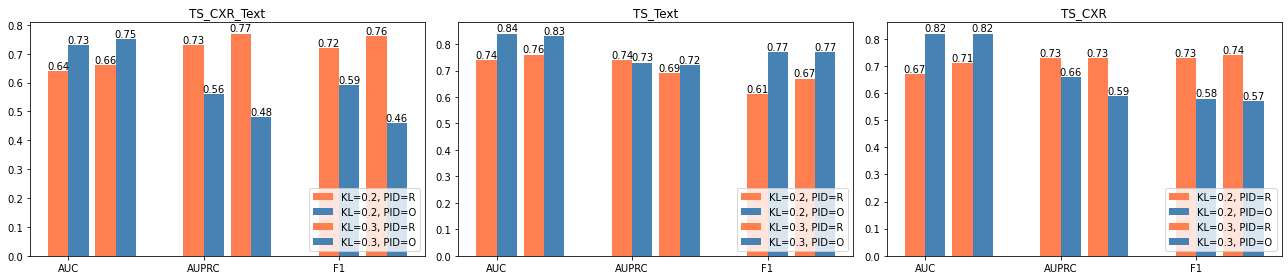

In [38]:
import matplotlib.pyplot as plt
import numpy as np

print("Metrics for LOS task")
# Sample data: replace with your actual data
# Data format: [Modality][KL][PID][Metric]
data = {
    'TS_CXR_Text': {
        0.2: {'R': {'AUC': 0.64, 'AUPRC': 0.73, 'F1': 0.72}, 'O': {'AUC': 0.73, 'AUPRC': 0.56, 'F1': 0.59}},
        0.3: {'R': {'AUC': 0.66, 'AUPRC': 0.77, 'F1': 0.76}, 'O': {'AUC': 0.75, 'AUPRC': 0.48, 'F1': 0.46}}
    },
    'TS_Text': {
        0.2: {'R': {'AUC': 0.74, 'AUPRC': 0.74, 'F1': 0.61}, 'O': {'AUC': 0.84, 'AUPRC': 0.73, 'F1': 0.77}},
        0.3: {'R': {'AUC': 0.76, 'AUPRC': 0.69, 'F1': 0.67}, 'O': {'AUC': 0.83, 'AUPRC': 0.72, 'F1': 0.77}}
    },
    'TS_CXR': {
        0.2: {'R': {'AUC': 0.67, 'AUPRC': 0.73, 'F1': 0.73}, 'O': {'AUC': 0.82, 'AUPRC': 0.66, 'F1': 0.58}},
        0.3: {'R': {'AUC': 0.71, 'AUPRC': 0.73, 'F1': 0.74}, 'O': {'AUC': 0.82, 'AUPRC': 0.59, 'F1': 0.57}}
    }
}

# Colors for the bars
colors = ['coral', 'steelblue', 'coral', 'steelblue']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))  # 3 subplots, one for each model
metrics = ['AUC', 'AUPRC', 'F1']
kl_labels = [0.2, 0.3]
pid_labels = ['R', 'O']
bar_width = 0.15  # Width of bars for visualization
offset = 0.05  # Distance between groups

# Plotting loop
for ax_idx, (modality, modality_data) in enumerate(data.items()):
    ax = axs[ax_idx]
    x = np.arange(len(metrics))  # Base x-array
    
    for kl_idx, (kl, kl_data) in enumerate(modality_data.items()):
        for pid_idx, pid in enumerate(pid_labels):
            metrics_vals = [kl_data[pid][metric] for metric in metrics]
            positions = x + (kl_idx * len(pid_labels) * bar_width + pid_idx * bar_width + offset * kl_idx)
            #ax.bar(positions, metrics_vals, width=bar_width, label=f'KL={kl}, PID={pid}', color=colors[kl_idx*len(pid_labels)+pid_idx])
            for rect, value in zip(ax.bar(positions, metrics_vals, width=bar_width, label=f'KL={kl}, PID={pid}', color=colors[kl_idx*len(pid_labels)+pid_idx]), metrics_vals):
                ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), f'{value:.2f}', ha='center', va='bottom')

    # Adjusting x-ticks and labels
    ax.set_xticks(x + bar_width/2)
    ax.set_xticklabels(metrics)
    ax.set_title(modality)
    ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

Metrics for IHM task


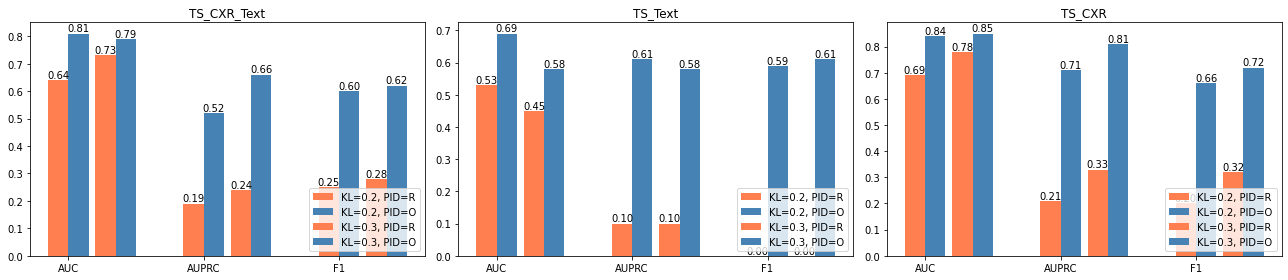

In [82]:
print("Metrics for IHM task")
# Sample data: replace with your actual data
# Data format: [Modality][KL][PID][Metric]
data = {
    'TS_CXR_Text': {
        0.2: {'R': {'AUC': 0.64, 'AUPRC': 0.19, 'F1': 0.25}, 'O': {'AUC': 0.81, 'AUPRC': 0.52, 'F1': 0.60}},
        0.3: {'R': {'AUC': 0.73, 'AUPRC': 0.24, 'F1': 0.28}, 'O': {'AUC': 0.79, 'AUPRC': 0.66, 'F1': 0.62}}
    },
    'TS_Text': {
        0.2: {'R': {'AUC': 0.53, 'AUPRC': 0.10, 'F1': 0}, 'O': {'AUC': 0.69, 'AUPRC': 0.61, 'F1': 0.59}},
        0.3: {'R': {'AUC': 0.45, 'AUPRC': 0.10, 'F1': 0}, 'O': {'AUC': 0.58, 'AUPRC': 0.58, 'F1': 0.61}}
    },
    'TS_CXR': {
        0.2: {'R': {'AUC': 0.69, 'AUPRC': 0.21, 'F1': 0.20}, 'O': {'AUC': 0.84, 'AUPRC': 0.71, 'F1': 0.66}},
        0.3: {'R': {'AUC': 0.78, 'AUPRC': 0.33, 'F1': 0.32}, 'O': {'AUC': 0.85, 'AUPRC': 0.81, 'F1': 0.72}}
    }
}

# Colors for the bars
colors = ['coral', 'steelblue', 'coral', 'steelblue']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))  # 3 subplots, one for each model
metrics = ['AUC', 'AUPRC', 'F1']
kl_labels = [0.2, 0.3]
pid_labels = ['R', 'O']
bar_width = 0.15  # Width of bars for visualization
offset = 0.05  # Distance between groups

# Plotting loop
for ax_idx, (modality, modality_data) in enumerate(data.items()):
    ax = axs[ax_idx]
    x = np.arange(len(metrics))  # Base x-array
    
    for kl_idx, (kl, kl_data) in enumerate(modality_data.items()):
        for pid_idx, pid in enumerate(pid_labels):
            metrics_vals = [kl_data[pid][metric] for metric in metrics]
            positions = x + (kl_idx * len(pid_labels) * bar_width + pid_idx * bar_width + offset * kl_idx)
            #ax.bar(positions, metrics_vals, width=bar_width, label=f'KL={kl}, PID={pid}', color=colors[kl_idx*len(pid_labels)+pid_idx])
            for rect, value in zip(ax.bar(positions, metrics_vals, width=bar_width, label=f'KL={kl}, PID={pid}', color=colors[kl_idx*len(pid_labels)+pid_idx]), metrics_vals):
                ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), f'{value:.2f}', ha='center', va='bottom')

    # Adjusting x-ticks and labels
    ax.set_xticks(x + bar_width/2)
    ax.set_xticklabels(metrics)
    ax.set_title(modality)
    ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

# Augmentation

In [2]:
import pickle
def load_data(file_path):
    """ Load the data from a pickle file. """
    with open(file_path, 'rb') as f:
        return pickle.load(f)

In [6]:
dir = '/data/wang/junh/datasets/multimodal/augmentation/multiclass/test_los-48-cxr-notes-ecg_stays.pkl'
data = load_data(dir)
zero = 0
one = 0
two = 0
three = 0
for line in data:
    if line['label'] == 0:
        zero += 1
    elif line['label'] == 1:
        one += 1
    elif line['label'] == 2:
        two += 1
    elif line['label'] == 3:
        three += 1

print(zero, one, two, three)

237 348 132 60


- ihm

In [85]:
output_dir = '/data/wang/junh/results/Fuse_moe/all_ihm/pid_results_3mod/augmented/'
tasks = 'ihm'
PIDs = ['R_TS_CXR_Text', 'Umaj_TS_CXR_Text', 'Umin_TS_CXR_Text', 'S_TS_CXR_Text']
final_results = aggregate_results(output_dir, tasks, PIDs)
print("Aggregated Metrics:", final_results)

Data for PID=R: AUC=0.708273167416971, AUPRC=0.1915496360810119, F1=0.10638297872340424, Sample Size=647
Data for PID=Umaj: AUC=0.20833333333333334, AUPRC=0.1589146964146964, F1=0.0, Sample Size=23
Data for PID=Umin: AUC=0.5078125, AUPRC=0.6673769260702132, F1=0.6923076923076924, Sample Size=44
Data for PID=S: AUC=0.5223499361430396, AUPRC=0.4734025320637028, F1=0.5084745762711864, Sample Size=62
Aggregated Metrics: {'auc': 0.6672343453947363, 'auprc': 0.2400814359497315, 'f1': 0.16857828534071465, 'total_samples': 776}


In [4]:
output_dir = '/data/wang/junh/results/Fuse_moe/all_ihm/pid_results_3mod/augmented'
tasks = 'ihm'
PIDs = ['R_TS_CXR_Text', 'Umaj_TS_CXR_Text', 'Umin_TS_CXR_Text', 'S_TS_CXR_Text']
final_results = aggregate_results(output_dir, tasks, PIDs)
print("Aggregated Metrics:", final_results)

Data for PID=R: AUC=0.7350717743990487, AUPRC=0.19018686505118132, F1=0.11494252873563218, Sample Size=647
Data for PID=Umaj: AUC=0.18750000000000003, AUPRC=0.15364010989010987, F1=0.0, Sample Size=23
Data for PID=Umin: AUC=0.4466145833333333, AUPRC=0.5841178224848856, F1=0.5882352941176471, Sample Size=44
Data for PID=S: AUC=0.49936143039591313, AUPRC=0.44152312542049876, F1=0.5, Sample Size=62
Aggregated Metrics: {'auc': 0.6836538510146879, 'auprc': 0.2315209306456092, 'f1': 0.16913681576434345, 'total_samples': 776}


- los

In [86]:
output_dir = '/data/wang/junh/results/Fuse_moe/all_los/pid_results_3mod/augmented/'
tasks = 'los'
PIDs = ['R_TS_CXR_Text', 'Umaj_TS_CXR_Text', 'Umin_TS_CXR_Text', 'S_TS_CXR_Text']
final_results = aggregate_results(output_dir, tasks, PIDs)
print("Aggregated Metrics:", final_results)

Data for PID=R: AUC=0.9257918221051861, AUPRC=0.8481422830562306, F1=0.8686868686868686, Sample Size=245
Data for PID=Umaj: AUC=0.7726428571428571, AUPRC=0.6431898351074554, F1=0.702928870292887, Sample Size=241
Data for PID=Umin: AUC=0.6121699196326061, AUPRC=0.5673017998681773, F1=0.6906077348066298, Sample Size=266
Data for PID=S: AUC=0.4740740740740741, AUPRC=0.42588903778386433, F1=0.5185185185185185, Sample Size=24
Aggregated Metrics: {'auc': 0.7567537389010955, 'auprc': 0.6751639501049242, 'f1': 0.7453353640101503, 'total_samples': 776}


# Multiclass

In [8]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def load_and_process_json_data(json_file_path):
    # Load the JSON data from the file
    with open(json_file_path, 'r') as file:
        data = json.load(file)

    # Extract data from the JSON object
    pids = data['PID']
    confusion_matrices = data['confusion_matrix']
    classification_reports = data['classification_report']
    f1_scores = data['f1']
    sample_sizes = data['sample_size']

    # Function to parse classification report
    def parse_classification_report(report):
        lines = report.split('\n')
        metrics = {}
        for line in lines[2:6]:  # Adjust line index if header varies
            parts = line.split()
            if parts:
                label = " ".join(parts[:-4])  # Assuming last four are numbers
                precision = float(parts[-4])
                recall = float(parts[-3])
                f1_score = float(parts[-2])
                support = int(parts[-1])
                metrics[label] = {
                    'precision': precision,
                    'recall': recall,
                    'f1-score': f1_score,
                    'support': support
                }
        return metrics

    # Initialize results dictionary
    results = {
        'PID_Results': {},
        'Aggregated_F1': None
    }

    # Calculate individual PID results and compute weighted averages
    weighted_f1 = 0
    total_sample_size = 0

    for pid, matrix, report, f1, sample_size in zip(pids, confusion_matrices, classification_reports, f1_scores, sample_sizes):
        pid_result = {
            'Confusion_Matrix': matrix,
            'Classification_Report': parse_classification_report(report),
            'F1_Score': f1,
            'Sample_Size': sample_size
        }
        results['PID_Results'][pid] = pid_result

        # Calculate weighted f1 score
        weighted_f1 += f1 * sample_size
        total_sample_size += sample_size

    # Calculate and set aggregated (sample size weighted) F1 score
    results['Aggregated_F1'] = weighted_f1 / total_sample_size if total_sample_size > 0 else 0
    
    return results

In [5]:
# PID on 3 modalities
json_file_path = '/data/wang/junh/results/Fuse_moe/all_los/multiclass/los_O_TS_CXR_Text_results.json'
results = load_and_process_json_data(json_file_path)
print(results)

{'PID_Results': {'R': {'Confusion_Matrix': [[99, 39, 2, 0], [95, 91, 3, 0], [19, 22, 1, 0], [3, 10, 0, 0]], 'Classification_Report': {'≤ 3 days': {'precision': 0.46, 'recall': 0.71, 'f1-score': 0.56, 'support': 140}, '> 3 & ≤ 7 days': {'precision': 0.56, 'recall': 0.48, 'f1-score': 0.52, 'support': 189}, '> 7 & ≤ 14 days': {'precision': 0.17, 'recall': 0.02, 'f1-score': 0.04, 'support': 42}, '> 14 days': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 13}}, 'F1_Score': 0.27909124011652103, 'Sample_Size': 391}, 'O': {'Confusion_Matrix': [[62, 18, 3, 11], [60, 62, 11, 21], [11, 44, 11, 24], [2, 26, 4, 14]], 'Classification_Report': {'≤ 3 days': {'precision': 0.46, 'recall': 0.66, 'f1-score': 0.54, 'support': 94}, '> 3 & ≤ 7 days': {'precision': 0.41, 'recall': 0.4, 'f1-score': 0.41, 'support': 154}, '> 7 & ≤ 14 days': {'precision': 0.38, 'recall': 0.12, 'f1-score': 0.18, 'support': 90}, '> 14 days': {'precision': 0.2, 'recall': 0.3, 'f1-score': 0.24, 'support': 46}}, 'F1_Sc

In [14]:
json_file_path = '/data/wang/junh/results/Fuse_moe/all_los/multiclass/augmented_R/los_O_TS_CXR_Text_results.json'
results = load_and_process_json_data(json_file_path)
print(results)

{'PID_Results': {'R': {'Confusion_Matrix': [[116, 24, 0, 0], [123, 64, 0, 2], [22, 19, 1, 0], [3, 8, 0, 2]], 'Classification_Report': {'≤ 3 days': {'precision': 0.44, 'recall': 0.83, 'f1-score': 0.57, 'support': 140}, '> 3 & ≤ 7 days': {'precision': 0.56, 'recall': 0.34, 'f1-score': 0.42, 'support': 189}, '> 7 & ≤ 14 days': {'precision': 1.0, 'recall': 0.02, 'f1-score': 0.05, 'support': 42}, '> 14 days': {'precision': 0.5, 'recall': 0.15, 'f1-score': 0.24, 'support': 13}}, 'F1_Score': 0.31927895071888934, 'Sample_Size': 391}, 'O': {'Confusion_Matrix': [[49, 21, 10, 14], [44, 25, 44, 41], [5, 9, 34, 42], [1, 6, 7, 32]], 'Classification_Report': {'≤ 3 days': {'precision': 0.49, 'recall': 0.52, 'f1-score': 0.51, 'support': 94}, '> 3 & ≤ 7 days': {'precision': 0.41, 'recall': 0.16, 'f1-score': 0.23, 'support': 154}, '> 7 & ≤ 14 days': {'precision': 0.36, 'recall': 0.38, 'f1-score': 0.37, 'support': 90}, '> 14 days': {'precision': 0.25, 'recall': 0.7, 'f1-score': 0.37, 'support': 46}}, 'F1_

In [13]:
# PID on 4 modalities
json_file_path = '/data/wang/junh/results/Fuse_moe/all_los/multiclass/los_O_TS_CXR_Text_ECG_results.json'
results = load_and_process_json_data(json_file_path)
print(results)

{'PID_Results': {'R': {'Confusion_Matrix': [[33, 57, 3, 0], [23, 94, 10, 0], [2, 33, 4, 0], [1, 9, 3, 0]], 'Classification_Report': {'≤ 3 days': {'precision': 0.56, 'recall': 0.35, 'f1-score': 0.43, 'support': 93}, '> 3 & ≤ 7 days': {'precision': 0.49, 'recall': 0.74, 'f1-score': 0.59, 'support': 127}, '> 7 & ≤ 14 days': {'precision': 0.2, 'recall': 0.1, 'f1-score': 0.14, 'support': 39}, '> 14 days': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 13}}, 'F1_Score': 0.2893259366636931, 'Sample_Size': 277}, 'O': {'Confusion_Matrix': [[82, 33, 20, 5], [84, 64, 62, 8], [10, 26, 45, 12], [1, 10, 29, 5]], 'Classification_Report': {'≤ 3 days': {'precision': 0.46, 'recall': 0.59, 'f1-score': 0.52, 'support': 140}, '> 3 & ≤ 7 days': {'precision': 0.48, 'recall': 0.29, 'f1-score': 0.36, 'support': 218}, '> 7 & ≤ 14 days': {'precision': 0.29, 'recall': 0.48, 'f1-score': 0.36, 'support': 93}, '> 14 days': {'precision': 0.17, 'recall': 0.11, 'f1-score': 0.13, 'support': 45}}, 'F1_Scor

In [9]:
json_file_path = '/data/wang/junh/results/Fuse_moe/all_los/multiclass/augmented_R/los_O_TS_CXR_Text_ECG_results.json'
results = load_and_process_json_data(json_file_path)
print(results)

{'PID_Results': {'R': {'Confusion_Matrix': [[15, 72, 5, 1], [6, 108, 10, 3], [3, 28, 6, 2], [0, 6, 6, 1]], 'Classification_Report': {'≤ 3 days': {'precision': 0.62, 'recall': 0.16, 'f1-score': 0.26, 'support': 93}, '> 3 & ≤ 7 days': {'precision': 0.5, 'recall': 0.85, 'f1-score': 0.63, 'support': 127}, '> 7 & ≤ 14 days': {'precision': 0.22, 'recall': 0.15, 'f1-score': 0.18, 'support': 39}, '> 14 days': {'precision': 0.14, 'recall': 0.08, 'f1-score': 0.1, 'support': 13}}, 'F1_Score': 0.2929148808181066, 'Sample_Size': 277}, 'O': {'Confusion_Matrix': [[69, 57, 13, 1], [69, 97, 49, 3], [9, 35, 38, 11], [0, 21, 20, 4]], 'Classification_Report': {'≤ 3 days': {'precision': 0.47, 'recall': 0.49, 'f1-score': 0.48, 'support': 140}, '> 3 & ≤ 7 days': {'precision': 0.46, 'recall': 0.44, 'f1-score': 0.45, 'support': 218}, '> 7 & ≤ 14 days': {'precision': 0.32, 'recall': 0.41, 'f1-score': 0.36, 'support': 93}, '> 14 days': {'precision': 0.21, 'recall': 0.09, 'f1-score': 0.12, 'support': 45}}, 'F1_Sc